In [1]:
#імпортуємо потрібні бібліотеки
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

plt.rcParams['figure.figsize'] = [13, 8]

In [2]:
#використовуємо вже готові файли textin and textout
textin = np.load('textin.npy')
textout = np.load('textout.npy')
traces = np.load('traces.npy')
num_traces = np.shape(traces)[0] - 1
num_samples = np.shape(traces)[1]

In [3]:
#box-заміна
Sbox = (
0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)



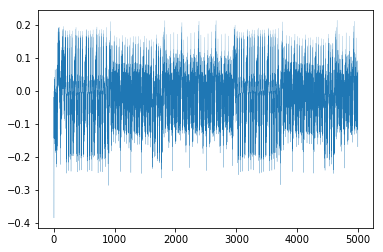

In [6]:
plt.plot(traces[0], linewidth=0.2)
plt.show()
hw = [bin(n).count("1") for n in range(0, 256)]

In [7]:
#функція кореляції
def cor(x, y):
    meanX = np.mean(x)
    meanY = np.mean(y)
    x = x - meanX
    y = y - meanY
    cov = sum([(x[_i] - meanX) * (y[_i] - meanY) for _i in range(len(x))])
    cov = sum(x*y)
    meanQuadraticX = sum([(x[_i] - meanX) ** 2 for _i in range(len(x))]) ** 0.5
    meanQuadraticX = sum(x ** 2)
    meanQuadraticY = sum([(y[_i] - meanY) ** 2 for _i in range(len(y))]) ** 0.5
    meanQuadraticY = sum(y ** 2)
    res = cov / (meanQuadraticX * meanQuadraticY)
    return abs(res)

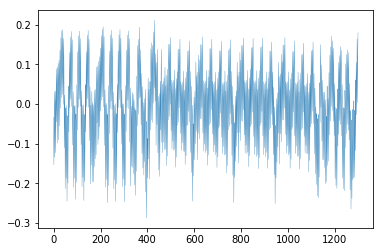

In [14]:
#вибірково зображуємо шматок
start = 500
end = 1800
n = 1
for i in range(n):
    plt.plot(traces[i][start:end], linewidth= 0.3)
    #plt.show()
def corr(x, y):
    return np.corrcoef(x, y)[1, 0]


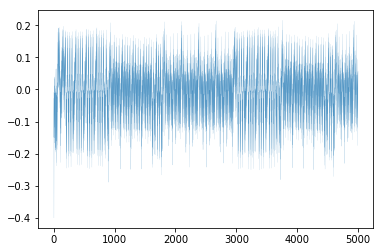

In [16]:
textin = np.load('textin.npy')
traces_amount = len(textin)
textout = np.load('textout.npy')
traces = np.load('traces.npy')
tmp_traces = np.transpose(traces)
meas_amount = len(traces[0])
plt.plot(traces[3], linewidth=0.09)
plt.show()

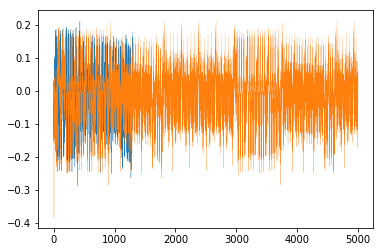

In [17]:
for i in range(n):
    plt.plot(traces[i][start:end], linewidth= 0.3)
    #plt.show()
def corr(x, y):
    return np.corrcoef(x, y)[1, 0]


#гіпотеза
def cross_all_bytes(textin, bnum, n):
    for kv in range(256):
        leakages = np.zeros(n)
        for i in range(n):
            leakages[i] = hw[Sbox[textin[i][bnum] ^ kv]]
        yield kv, leakages


textin = np.load('textin.npy')
traces_amount = len(textin)
textout = np.load('textout.npy')
traces = np.load('traces.npy')
tmp_traces = np.transpose(traces)
meas_amount = len(traces[0])
plt.plot(traces[0], linewidth=0.2)
plt.show()

In [ ]:
#утечка
ky= []
leak_places = []
for k in range(16):
    max_cor = 0
    leak_place = 0
    for b, leak in cross_all_bytes(textin, k, traces_amount):
        for i in range(meas_amount):
            real_values = tmp_traces[i]
            tmp_cor = cor(leak, real_values)
            if tmp_cor > max_cor:
                max_cor = tmp_cor
                leak_place = i
        print(b)
    leak_places.append(leak_place)
    print('max correlation:', max_cor)
    print('leak place:', leak_places[-1])
print(ky)
print(leak_places)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [ ]:
def aes_128_encryption(key, input):
    subkeys = KeySchedule(key) # subkeys[0] == key
    block = AddRoundKey(input, subkeys[0]) # <--input_i ^ subkey0_i
    for i in range(9):
        block = SubBytes(block) # <--first round: SBox[input_i ^ subkey0_i]
        block = ShiftRows(block)
        block = MixColumns(block)
        block = AddRoundKey(block< subkeys[i + 1])
    block = SubBytes(block) # <-- InvSBox[output ^ subkey10_i]
    block = ShiftRow(block)
    output = AddRoundKey(block, subkeys[i + 1]) # <-- output ^ subkey10_i
    return output


In [ ]:
colors = ['b', 'r', 'y', 'g'] 
j = 0
plt.plot(np.array(range(5000)), traces[0], '--', linewidth=0.1, label='trace 0')
for i in range(16):
    if j == 4:                   
        plt.legend(loc='best')
        plt.show()
        plt.plot(np.array(range(5000)), traces[0], '--', linewidth=0.1, label='trace 0')
        plt.show()
